_ANN for MNIST digit Classification_

## Question 1

Classify MNIST digits using Fully Connected Neural network.

Dataset : download from internet source

- Plot few samples from dataset
- Train the network 
- Test on the test dataset
- Calculate test accuracy on test set

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(8, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(2, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(6, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(6, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(3, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(3, shape=(), dtype=int64)


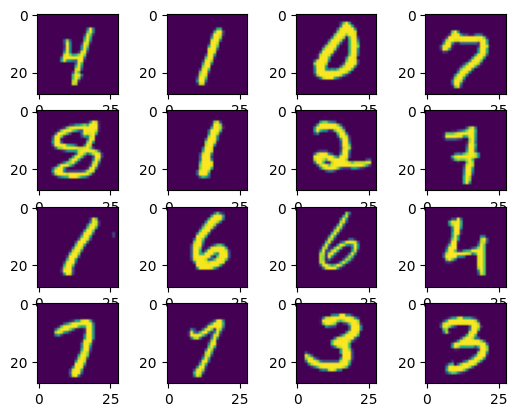

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

sample=ds_train.take(16)

fig,axes=plt.subplots(4,4)

for index,(image,label) in enumerate(sample):
    print(image.shape,label)
    axes[int(index/4)][index%4].imshow(image)

In [4]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.batch(128)

In [5]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.summary()

c:\Users\Falcon\Desktop\DL\DL_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
)

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6110 - sparse_categorical_accuracy: 0.8355
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1783 - sparse_categorical_accuracy: 0.9498
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1269 - sparse_categorical_accuracy: 0.9633
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0985 - sparse_categorical_accuracy: 0.9717
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0799 - sparse_categorical_accuracy: 0.9774
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0664 - sparse_categorical_accuracy: 0.9817


In [8]:
result=model.evaluate(ds_test)
print(f'Accuracy: {result[1]}')
print(f'Loss: {result[0]}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0932 - sparse_categorical_accuracy: 0.9705
Accuracy: 0.972100019454956
Loss: 0.09034173935651779
